In [57]:
from matplotlib import pyplot as plt
import numpy as np

import json
from os.path import join

%matplotlib inline
plt.rcdefaults() 

INPUT_PATH = "../results/classifiers/mnist/"
CLASSIFIERS = ["resnet/relu", "resnet/brelu", "cnn/relu", "cnn/brelu"]
               
accuracies = {}
for c in CLASSIFIERS:
    with open(join(INPUT_PATH, c, "accuracies.json"), "r") as json_file:
        accuracies[c] = json.load(json_file)

Accuracy on white-box attacks with fgsm


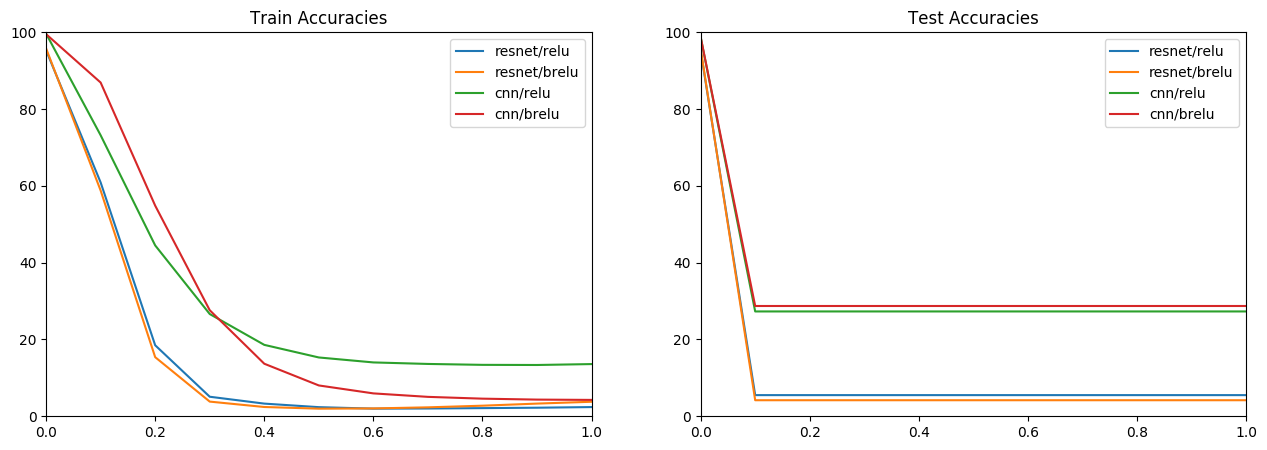

In [59]:
print("Accuracy on white-box attacks with fgsm")
PATH = "/dccstor/dlw/data/adversarial_learning/adversarial/mnist/"

train, test = {}, {}
eps_values = [e/10 for e in range(1, 11)]

for c in CLASSIFIERS:
    train[c] = []
    test[c] = []
    
    train[c].append(accuracies[c]["train_accuracy"])
    test[c].append(accuracies[c]["test_accuracy"])

    for eps in eps_values:
        train[c].append(accuracies[c][join(PATH, c, "fgsm", "eps%.2f_train.npy" % eps)])
        test[c].append(accuracies[c][join(PATH, c, "fgsm", "eps%.2f_test.npy" % eps)])

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.title("Train Accuracies")

for c in CLASSIFIERS:
    plt.plot([0.] + eps_values, train[c], label=c)

ax.set_xlim([0, 1])
ax.set_ylim([0, 100])
plt.legend()

ax = fig.add_subplot(1, 2, 2)
plt.title("Test Accuracies")

for c in CLASSIFIERS:
    plt.plot([0.] + eps_values, test[c], label=c)
    
ax.set_xlim([0, 1])
ax.set_ylim([0, 100])
    
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
plt.legend()

Accuracy on white-box attacks with deepfool and universal-deepfool


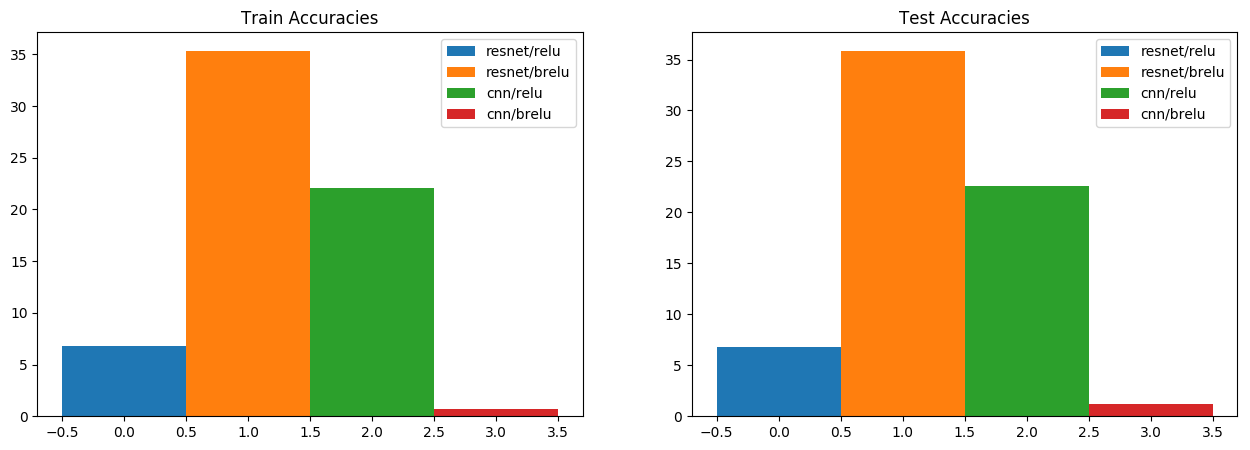

In [71]:
print("Accuracy on white-box attacks with deepfool")

train, test = {}, {}

for c in CLASSIFIERS:
    train[c] = accuracies[c][join(PATH, c, "deepfool", "train.npy")]
    test[c] = accuracies[c][join(PATH, c, "deepfool", "test.npy")]

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.title("Train Accuracies")

for i,c in enumerate(CLASSIFIERS):
    ax.bar(i, train[c], 1, label=c)

plt.legend()

ax = fig.add_subplot(1, 2, 2)
plt.title("Test Accuracies")

for i,c in enumerate(CLASSIFIERS):
    ax.bar(i, test[c], 1, label=c)
    
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
plt.legend()

Accuracy on white-box attacks with universal-deepfool


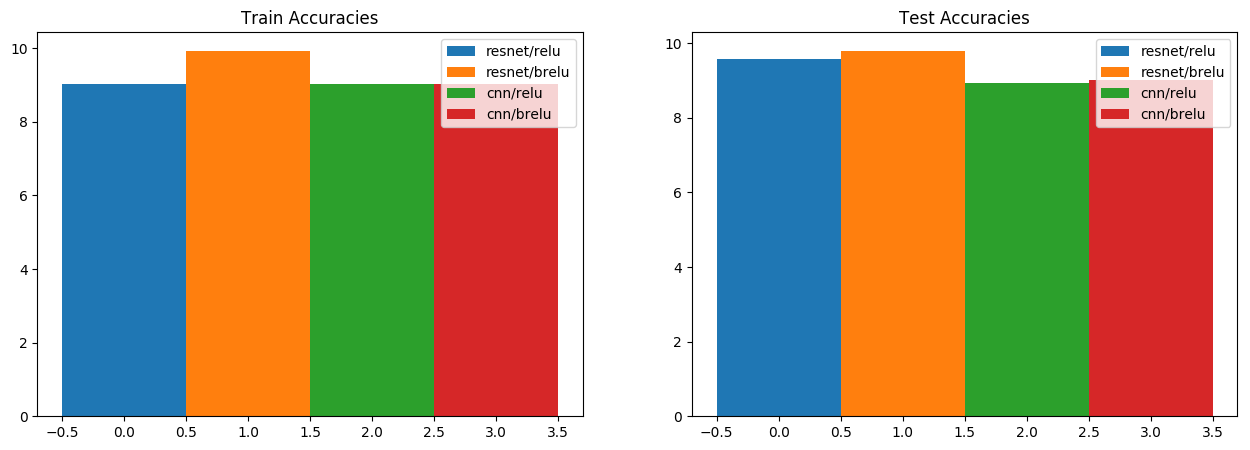

In [72]:
print("Accuracy on white-box attacks with universal-deepfool")

train, test = {}, {}

for c in CLASSIFIERS:
    train[c] = accuracies[c][join(PATH, c, "universal", "train.npy")]
    test[c] = accuracies[c][join(PATH, c, "universal", "test.npy")]

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.title("Train Accuracies")

for i,c in enumerate(CLASSIFIERS):
    ax.bar(i, train[c], 1, label=c)

plt.legend()

ax = fig.add_subplot(1, 2, 2)
plt.title("Test Accuracies")

for i,c in enumerate(CLASSIFIERS):
    ax.bar(i, test[c], 1, label=c)
    
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
plt.legend()